In [ ]:
from __future__ import print_function
import pyzbar.pyzbar as pyzbar
import numpy as np
import cv2

def decode(im) : 
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)
    print(decodedObjects)
    # Print results
    for obj in decodedObjects:
        print('Type : ', obj.type)
        print('Data : ', obj.data,'\n')
    
    return decodedObjects


# Display barcode and QR code location  
def display(im, decodedObjects):

    # Loop over all decoded objects
    for decodedObject in decodedObjects: 
        points = decodedObject.polygon

        # If the points do not form a quad, find convex hull
        if len(points) > 4 : 
            hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
            hull = list(map(tuple, np.squeeze(hull)))
        else : 
            hull = points;

        # Number of points in the convex hull
        n = len(hull)

        # Draw the convext hull
        for j in range(0,n):
            cv2.line(im, hull[j], hull[ (j+1) % n], (255,0,0), 3)

    # Display results 
    cv2.imshow("Results", im);
    cv2.waitKey(0);


# Main 
if __name__ == '__main__':

    # Read image
    im = cv2.imread('/Users/kunal/Documents/VdartWorking/New folder/numpy_altered_sample2.png')
    
    decodedObjects = decode(im)
    display(im, decodedObjects)

[]


In [9]:
import cv2
import os
import numpy as np
os.chdir('/Users/kunal/Documents/VdartWorking/images/')
original = cv2.imread("original_golden_bridge.jpg")
image_to_compare = cv2.imread("george-washington-bridge.jpg")
# 1) Check if 2 images are equals
if original.shape == image_to_compare.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, image_to_compare)
    b, g, r = cv2.split(difference)

    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("The images are completely Equal")
    else:
        print("The images are NOT equal")
		
# 2) Check for similarities between the 2 images

sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(image_to_compare, None)

index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
ratio = 0.6
for m, n in matches:
	if m.distance < ratio*n.distance:
		good_points.append(m)
print(len(good_points))
result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)

cv2.imshow("result", result)
cv2.imshow("Original", original)
cv2.imshow("Duplicate", image_to_compare)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [2]:
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from pyzbar import pyzbar
import cv2
import pytesseract
from PIL import Image
import os
import cv2
import numpy as np
import imutils

In [3]:
from PIL import Image
from matplotlib import cm


In [4]:
xstartvalue = 400#430
ystartvalue = 560 #575
xendvalue = 600 #590
yendvalue = 650 #640

In [16]:
image = Image.open('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')
barcodeimg = image.crop((xstartvalue, ystartvalue, xendvalue, yendvalue))

In [18]:
greyscale_image = barcodeimg.convert('L')


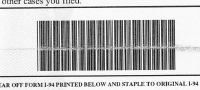

In [19]:
greyscale_image

In [27]:
image = cv2.imread('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')


In [28]:
image = image[ystartvalue:yendvalue, xstartvalue:xendvalue]

In [42]:
im = Image.fromarray(np.uint8(cm.gist_earth(image)*255))

TypeError: Cannot handle this data type

In [32]:
import os
os.chdir('/Users/kunal/Documents/VdartWorking/New folder/')


In [39]:
plt.imsave("filename.jpg", image, cmap='Greys')

In [41]:
barcodes = pyzbar.decode(image)
barcodes

[]

In [46]:
myarray = cv2.imread('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')


In [47]:
dpi = 100.0
w, h = myarray.shape[1]/dpi, myarray.shape[0]/dpi
fig = plt.figure(figsize=(w,h), dpi=dpi)
fig.figimage(sub, cmap=cm.gist_earth)

NameError: name 'sub' is not defined

<Figure size 698x910 with 0 Axes>

In [73]:
from PIL import Image
import numpy
im = Image.open('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')
np_im = numpy.array(im)
print (np_im.shape)
#print (np_im)

(910, 698, 4)


In [65]:
np_im = np_im[ystartvalue:yendvalue, xstartvalue:xendvalue]

In [67]:
np_im = np_im[0:10, 10:20]

In [72]:
np_im

array([], shape=(0, 0, 4), dtype=uint8)

In [71]:
cv2.imwrite("hg.jpg", np_im)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [74]:
#np_im = np_im - 18
new_im = Image.fromarray(np_im)
new_im.save("numpy_altered_sample2.png")

In [75]:
barcodes = pyzbar.decode(new_im)
barcodes

[]

In [ ]:
barcodes = pyzbar.decode(new_im)
barcodes

In [98]:
imageCV = cv2.imread('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')
barcodes = pyzbar.decode(imageCV)
barcodes

[]

In [ ]:
xstartvalue = 400#430
ystartvalue = 560 #575
xendvalue = 600 #590
yendvalue = 650

In [116]:
y = 500
x = 400
w = 200
h = 200

In [117]:
crop_img = imageCV[y:y+h, x:x+w]

In [118]:
new_im = Image.fromarray(crop_img)
new_im.save("numpy_altered_sample2.png")

array([[[251, 250, 252],
        [250, 249, 252],
        [249, 248, 251],
        ...,
        [249, 246, 249],
        [250, 247, 250],
        [250, 247, 250]],

       [[249, 248, 250],
        [248, 247, 250],
        [243, 242, 245],
        ...,
        [252, 249, 252],
        [249, 245, 248],
        [249, 245, 248]],

       [[249, 248, 251],
        [245, 246, 249],
        [251, 249, 252],
        ...,
        [249, 246, 249],
        [251, 248, 252],
        [251, 249, 251]],

       ...,

       [[248, 247, 250],
        [238, 243, 242],
        [241, 241, 241],
        ...,
        [248, 247, 250],
        [250, 249, 252],
        [250, 248, 251]],

       [[236, 240, 242],
        [231, 236, 236],
        [245, 246, 246],
        ...,
        [249, 248, 251],
        [249, 248, 251],
        [249, 248, 251]],

       [[238, 243, 243],
        [236, 232, 225],
        [183, 173, 158],
        ...,
        [250, 247, 250],
        [249, 246, 249],
        [250, 247, 250]]

In [123]:
imageCV = cv2.imread('/Users/kunal/Documents/VdartWorking/realFake/barcode.jpg')

array([[[236, 244, 244],
        [243, 248, 249],
        [248, 251, 255],
        ...,
        [255, 252, 254],
        [253, 252, 254],
        [253, 252, 254]],

       [[234, 242, 242],
        [239, 244, 245],
        [243, 246, 250],
        ...,
        [252, 251, 253],
        [252, 251, 253],
        [252, 251, 253]],

       [[238, 243, 244],
        [238, 243, 244],
        [239, 242, 246],
        ...,
        [249, 248, 250],
        [250, 249, 251],
        [251, 250, 252]],

       ...,

       [[240, 244, 245],
        [245, 249, 250],
        [250, 252, 253],
        ...,
        [244, 243, 245],
        [244, 243, 245],
        [244, 243, 245]],

       [[238, 242, 243],
        [244, 248, 249],
        [248, 250, 251],
        ...,
        [246, 245, 247],
        [246, 245, 247],
        [246, 245, 247]],

       [[233, 237, 238],
        [240, 244, 245],
        [243, 245, 246],
        ...,
        [250, 249, 251],
        [250, 249, 251],
        [250, 249, 251]]

In [121]:
barcodes = pyzbar.decode('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')
barcodes

[]

In [119]:
new_im = Image.fromarray(imageCV)
new_im.save("numpy_altered_sample3.png")

In [5]:
os.chdir('/Users/kunal/Documents/VdartWorking/New folder/')

In [9]:
imageCV = cv2.imread('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG')
barcodes = pyzbar.decode(imageCV)
barcodes

[]

In [10]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [11]:
new_im = Image.fromarray(imageCV)
new_im.save("numpy_altered_sampleredsj3.png")

In [13]:
from scipy import ndimage

In [12]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

AttributeError: module 'scipy.misc' has no attribute 'imsave'

In [19]:
#face.tofile('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG') # Create raw file
face_from_raw = np.fromfile('/Users/kunal/Documents/VdartWorking/realFake/DocumentPic.PNG', dtype=np.uint8)
face_from_raw.shape
face_from_raw.shape = (768, 1024, 3)


ValueError: cannot reshape array of size 1286777 into shape (768,1024,3)

In [17]:
face_from_raw

array([137,  80,  78, ...,  66,  96, 130], dtype=uint8)

In [18]:
new_im = Image.fromarray(face_from_raw)
new_im.save("numpy_altered_sampleredsfdsfdfdsffffffffffffffffffffffffj3.png")

IndexError: tuple index out of range

In [ ]:
from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # First we need to create the PNG file

face = misc.imread('face.png')
type(face)      

face.shape, face.dtype

In [26]:
import scipy.misc
scipy.misc.imread

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [47]:
from scipy import ndimage

In [58]:
from scipy import misc
import imageio
face = misc.face()
#misc.imsave('face.png', face) # First we need to create the PNG file
face = imageio.imread('/Users/kunal/Documents/VdartWorking/realFake/Document.jpg')
#type(face)      
imageio.imwrite('filename.jpg', face)

face.shape, face.dtype

((910, 698, 3), dtype('uint8'))

In [62]:
face.tofile('face.png') # Create raw file
face_from_raw = np.fromfile('face.png', dtype=np.uint8)
face_from_raw.shape

#face_from_raw.shape = (768, 1024, 3)

(1905540,)

In [104]:
face_memmap = np.memmap('face.png', dtype=np.uint8, shape=(698, 910, 3))

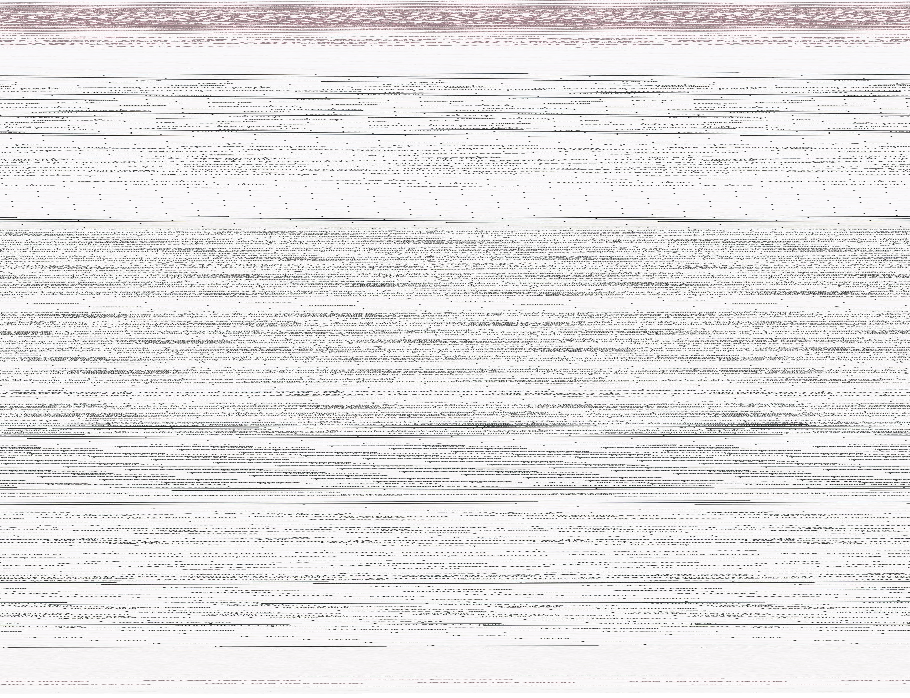

In [105]:
new_im = Image.fromarray(face_memmap)
new_im

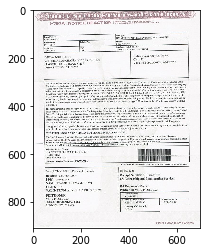

In [96]:
f = imageio.imread('/Users/kunal/Documents/VdartWorking/realFake/Document.jpg')  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)

(-0.5, 697.5, 909.5, -0.5)

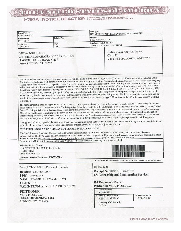

In [119]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        
plt.axis('off')

In [126]:
new_im = Image.fromarray(f[ystartvalue:yendvalue, xstartvalue:xendvalue])


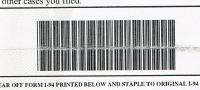

In [127]:
new_im

TypeError: Input must be a 2D array.

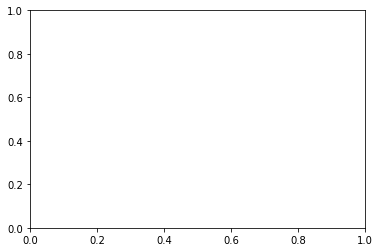

In [108]:
plt.contour(f, [50, 200])        

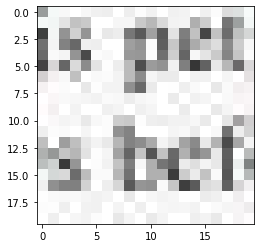

In [116]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')        

plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')        

In [110]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]



face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255

In [111]:
face = misc.face(gray=True)
face.mean()

face.max(), face.min()

(250, 0)

In [112]:
face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

In [113]:
rotate_face

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [118]:
new_im